In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read Data
df = pd.read_csv('aapl_ok.csv',sep=';')
df = df[['fecha', 'Ingresos']]
df

,fecha,Ingresos
0,12/29/1989,"1493,4"
1,03/30/1990,"1346,2"
2,06/29/1990,"1364,8"
3,09/28/1990,"1354,1"
4,12/28/1990,"1675,5"
...,...,...
122,06/27/2020,59685
123,09/26/2020,64698
124,12/26/2020,111439
125,03/27/2021,89584


In [3]:

df['fecha'] = pd.to_datetime(df['fecha'])
df = df.set_index('fecha')
df.head()

,Ingresos
fecha,
1989-12-29,"1493,4"
1990-03-30,"1346,2"
1990-06-29,"1364,8"
1990-09-28,"1354,1"
1990-12-28,"1675,5"


In [4]:
df.dtypes

Ingresos    object
dtype: object

In [5]:
df['Ingresos'] = df['Ingresos'].str.replace(',', '.').astype('float64')
print(df.head())
df.dtypes

            Ingresos
fecha               
1989-12-29    1493.4
1990-03-30    1346.2
1990-06-29    1364.8
1990-09-28    1354.1
1990-12-28    1675.5


Ingresos    float64
dtype: object

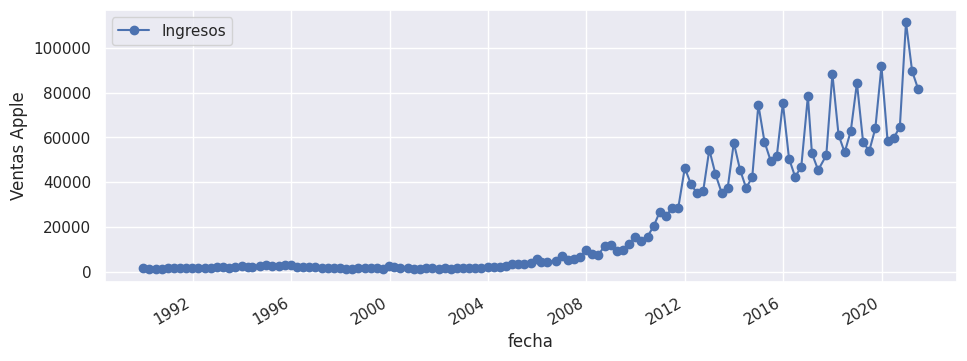

In [6]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = df.plot( y = 'Ingresos', marker='o', linestyle='-')
ax.set_ylabel('Ventas Apple');

### Los ingresos de Apple son no estacionarios tanto en varianza como en media ya que las propiedades estadísticas de la serie cambian con el tiempo. En la media se ve claramente en la tendencia que tienen los datos que no sabría decir si es multiplicativa o aditiva. En cuanto al componente estacional, es claramente multiplicativo ya que la variabilidad de los datos crece proporcionalmente con la tendencia  

In [7]:

# Agrupar por año y sumar los ingresos
df_anual = df.resample('Y').sum()

# Mostrar las ventas anuales
df_anual

,Ingresos
fecha,
1989-12-31,1493.4
1990-12-31,5740.6
1991-12-31,6496.0
1992-12-31,7224.2
1993-12-31,8445.6
1994-12-31,9551.9
1995-12-31,11378.0
1996-12-31,8814.0
1997-12-31,6530.0


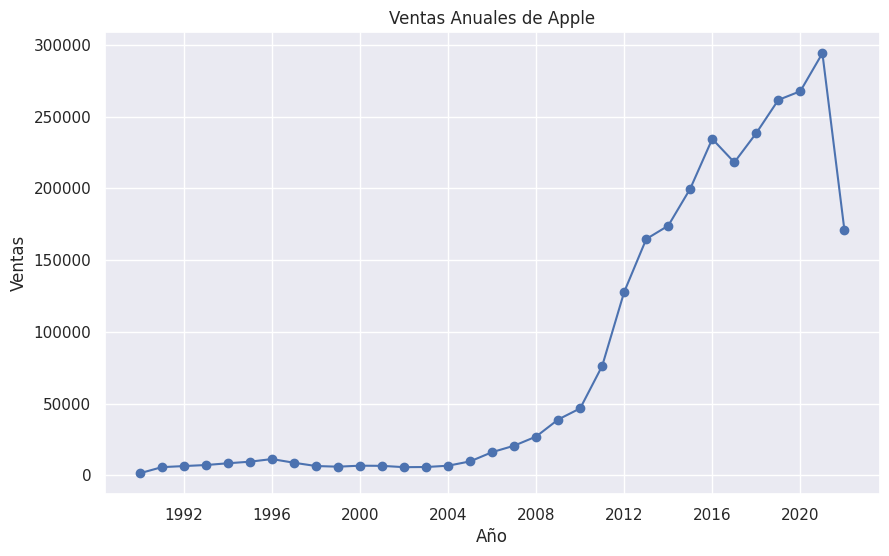

In [8]:
import matplotlib.pyplot as plt

# Suponiendo que 'ventas_anuales' es tu serie temporal agrupada por año
# Asegúrate de haber ejecutado el código para obtener 'ventas_anuales'

# Graficar las ventas anuales
plt.figure(figsize=(10, 6))
plt.plot(df_anual.index, df_anual['Ingresos'], marker='o', linestyle='-')
plt.title('Ventas Anuales de Apple')
plt.xlabel('Año')
plt.ylabel('Ventas')  # Ajusta la etiqueta según la escala de tus datos
plt.grid(True)
plt.show()


### Como podemos ver en el gráfico de las ventas anuales, el 2020 no tuvo tanta repercusión en Apple que siguió con su tendencia alcista en sus ingresos. El ultimo dato podemos quitarlo ya que solo tenemos los dos primeros trimestres del 2021 y por lo tanto es obviamente menor que en el año anterior

In [43]:

# Calcular las tasas de crecimiento anuales
df_anual['Crecimiento'] = df_anual['Ingresos'].pct_change() * 100
df_anual_cleaned = df_anual.dropna(subset=['Crecimiento'])
# Extraer el año de las fechas
df_anual_cleaned['Año'] = df_anual_cleaned.index.year

df_anual['Crecimiento']

/tmp/ipykernel_2178/1157185063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anual_cleaned['Año'] = df_anual_cleaned.index.year


fecha
1989-12-31           NaN
1990-12-31    284.398018
1991-12-31     13.158903
1992-12-31     11.209975
1993-12-31     16.907062
1994-12-31     13.099129
1995-12-31     19.117662
1996-12-31    -22.534716
1997-12-31    -25.913320
1998-12-31     -6.998469
1999-12-31     11.427630
2000-12-31     -1.773312
2001-12-31    -13.780653
2002-12-31      1.884488
2003-12-31     15.447851
2004-12-31     44.830144
2005-12-31     65.830175
2006-12-31     27.788758
2007-12-31     30.808642
2008-12-31     43.890182
2009-12-31     19.945559
2010-12-31     63.318918
2011-12-31     67.587798
2012-12-31     28.821740
2013-12-31      5.650112
2014-12-31     14.832866
2015-12-31     17.337337
2016-12-31     -6.962123
2017-12-31      9.360988
2018-12-31      9.674011
2019-12-31      2.320612
2020-12-31      9.881838
2021-12-31    -41.857310
Freq: A-DEC, Name: Crecimiento, dtype: float64

### Tanto en la tabla de arriba como en el gráfico de abajo podemos ver las tasas de crecimiento anuales de Apple. El dato de 1990 y el de 2021 podemos descartarlos ya que al no tener datos del año entero de 1989 ni de 2021 las tasas se disparan tanto hacia arriba como hacia abajo

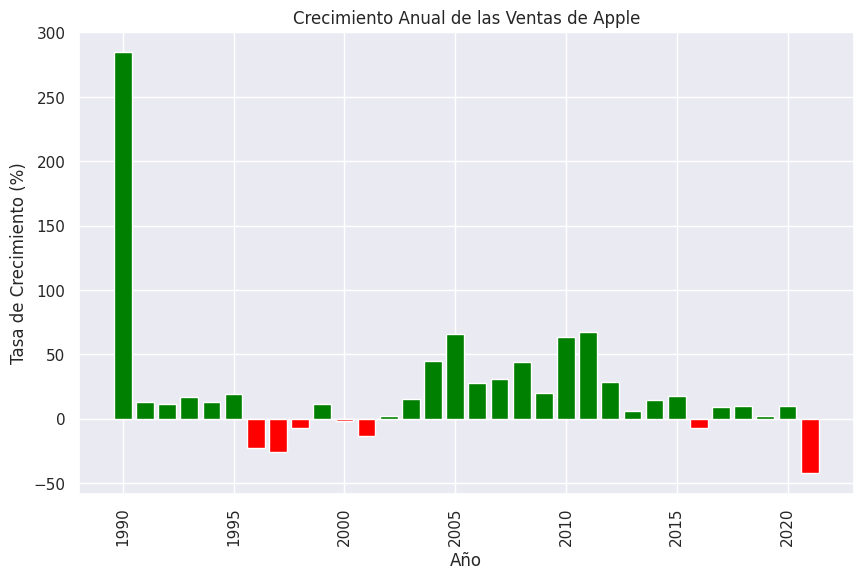

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df_anual_cleaned' es tu DataFrame después de la limpieza
# Asegúrate de haber ejecutado el código para obtener 'df_anual_cleaned'

# Graficar las tasas de crecimiento anuales con colores diferentes
plt.figure(figsize=(10, 6))

# Crear una lista de colores basada en el signo de 'Crecimiento'
colores = ['green' if x >= 0 else 'red' for x in df_anual_cleaned['Crecimiento']]

# Utilizar Matplotlib directamente para la barplot y asignar colores
plt.bar(df_anual_cleaned['Año'], df_anual_cleaned['Crecimiento'], color=colores)

plt.title('Crecimiento Anual de las Ventas de Apple')
plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento (%)')
plt.xticks(rotation=90)

plt.show()


In [11]:
trimestral=df.resample("q").last()
#ko_ts=ko_df['Ingresos'].astype('float64').to_period('Q')
trimestral.tail()

,Ingresos
fecha,
2020-06-30,59685.0
2020-09-30,64698.0
2020-12-31,111439.0
2021-03-31,89584.0
2021-06-30,81434.0


In [12]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Comportamiento Estacional')

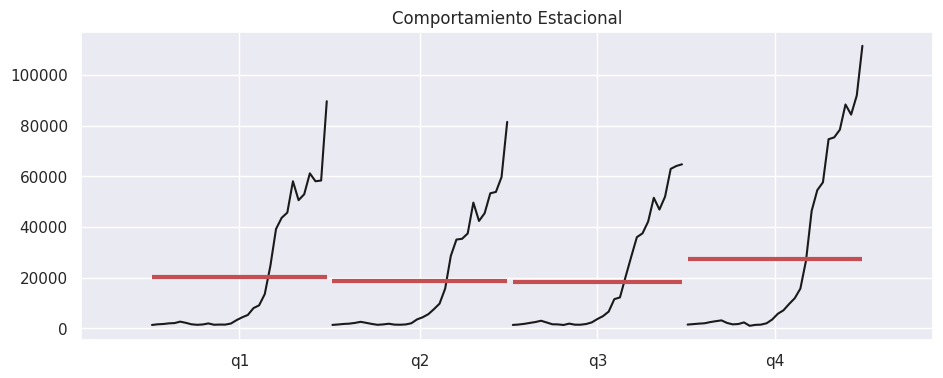

In [13]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(trimestral['Ingresos'],ax=ax)
ax.set_title('Comportamiento Estacional')

### Aqui podemos ver que el cuarto y último trimestre es siempre mejor para apple , probablemente por los regalos de Navidad de diciembre


In [14]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

119 8


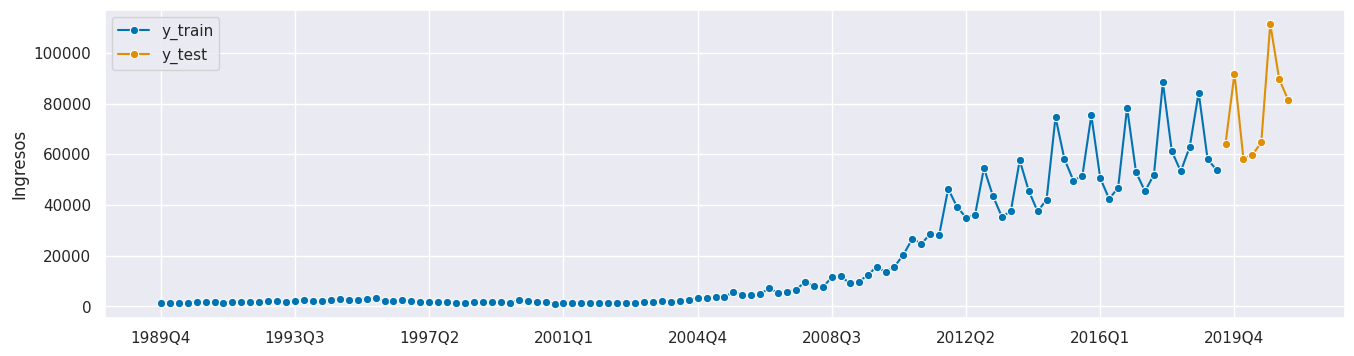

In [15]:
y_train, y_test = temporal_train_test_split(y = trimestral['Ingresos'].astype('float64').to_period('Q'), test_size=8)
# we will try to forecast y_test from y_train
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [16]:
from sktime.forecasting.ets import AutoETS

In [17]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 15)

# step 3: specifying the forecasting algorithm
aapl_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)

aapl_auto_model.fit(y_train)
print(aapl_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  119
Model:                       ETS(MAM)   Log Likelihood                -968.025
Date:                Sun, 08 Oct 2023   AIC                           1956.050
Time:                        18:29:13   BIC                           1983.841
Sample:                    12-31-1989   HQIC                          1967.335
                         - 06-30-2019   Scale                            0.018
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.4225      0.055      7.739      0.000       0.316       0.530
smoothing_trend        0.1685      0.034      4.890      0.000       0.101       0.236
smoothing_seasonal  

In [18]:
# step 5: querying predictions
aapl_pred = aapl_auto_model.predict(fh)
print(aapl_pred)

2019Q3    58581.326742
2019Q4    85963.040159
2020Q1    59751.798679
2020Q2    53079.526151
2020Q3    58323.465808
2020Q4    85584.234646
2021Q1    59488.205472
2021Q2    52845.108937
2021Q3    58065.604875
2021Q4    85205.429133
2022Q1    59224.612265
2022Q2    52610.691722
2022Q3    57807.743942
2022Q4    84826.623619
Freq: Q-DEC, Name: Ingresos, dtype: float64


In [19]:
aapl_pred_ints = aapl_auto_model.predict_interval(fh, coverage=0.9)
aapl_pred_ints

Ingresos               
                 0.9               
               lower          upper
2019Q3  46044.678410   71303.777358
2019Q4  62608.069175  108608.775911
2020Q1  41564.333370   77150.336435
2020Q2  33976.818192   73404.252757
2020Q3  33256.502032   88418.514353
2020Q4  42814.564771  139572.251655
2021Q1  25432.440993  101817.451085
2021Q2  18518.127188   92885.598726
2021Q3  15209.528509  112211.539525
2021Q4  16694.093363  184108.403632
2022Q1   6513.697910  133745.754495
2022Q2   1632.410303  122916.601177
2022Q3  -3519.007610  151926.938959
2022Q4 -11078.011153  236626.786899

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

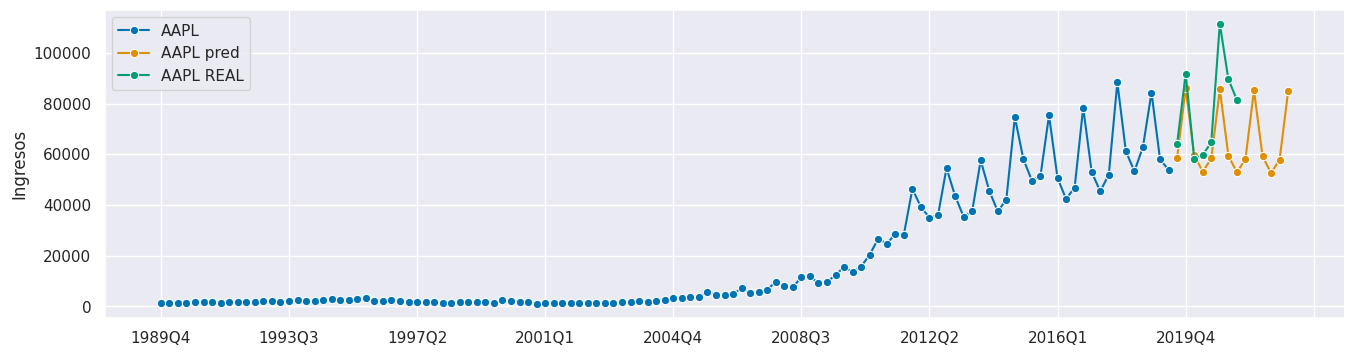

In [20]:
# optional: plotting predictions and past data
plot_series(y_train, aapl_pred,y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

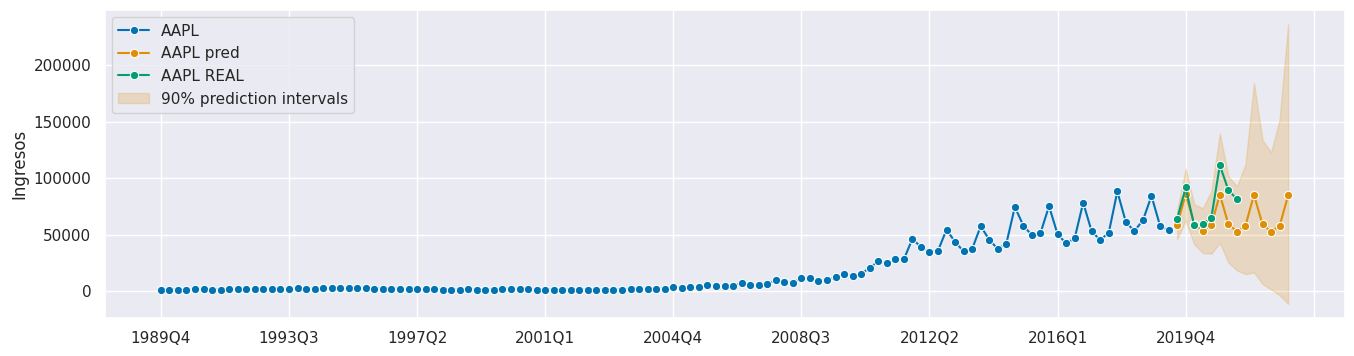

In [21]:
fig, ax = plot_series(y_train, aapl_pred, y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    aapl_pred_ints[('Ingresos', 0.9, 'lower')],
    aapl_pred_ints[('Ingresos', 0.9, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"90% prediction intervals",
)
ax.legend(loc='upper left')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

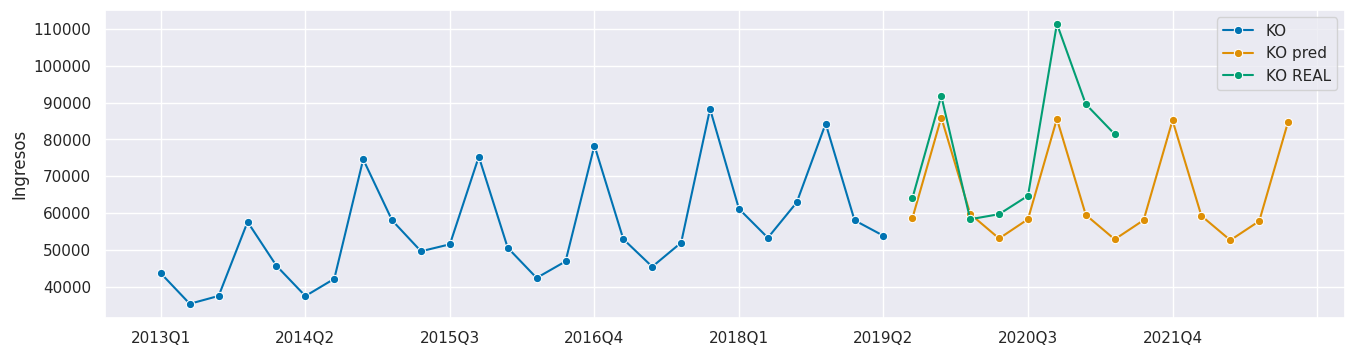

In [22]:
plot_series(y_train["2013":], aapl_pred,y_test, labels=["KO", "KO pred", "KO REAL"])

In [23]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, aapl_pred[0:8])

0.16273953082780607

In [24]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, aapl_pred[0:8])

317747115.49760485

In [25]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, aapl_pred[0:8])

17825.462560550983

In [26]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend='multiplicative', seasonal='multiplicative', sp=4) #el error lo toma aditivo si no pongo nada
forecaster.fit(y_train)

/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ExponentialSmoothing(seasonal='multiplicative', sp=4, trend='multiplicative')

In [27]:
fh = np.arange(1, 15)
y_pred = forecaster.predict(fh)
y_pred

2019Q3     61466.439517
2019Q4     94037.269536
2020Q1     67629.948649
2020Q2     60848.128567
2020Q3     70158.713485
2020Q4    107335.546065
2021Q1     77193.835002
2021Q2     69452.964117
2021Q3     80080.205011
2021Q4    122514.397812
2022Q1     88110.197943
2022Q2     79274.652126
2022Q3     91404.743846
2022Q4    139839.766243
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [28]:
print(forecaster._fitted_forecaster.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Ingresos   No. Observations:                  119
Model:             ExponentialSmoothing   SSE                     1042754890.323
Optimized:                         True   AIC                           1918.335
Trend:                   Multiplicative   BIC                           1940.568
Seasonal:                Multiplicative   AICC                          1920.372
Seasonal Periods:                     4   Date:                 Sun, 08 Oct 2023
Box-Cox:                          False   Time:                         18:29:15
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6767857                alpha                 True
smoothing_trend          

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

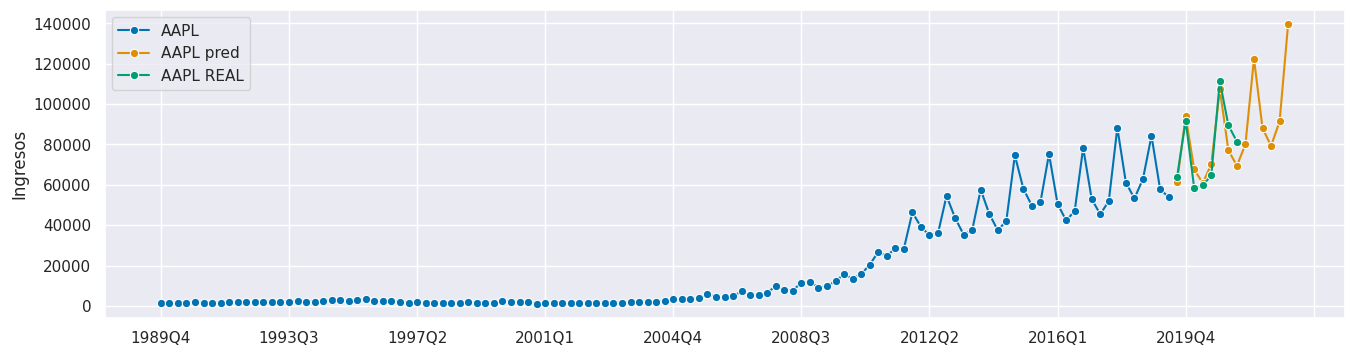

In [29]:
#plot_series(y, y_pred, labels=["KO", "KO pred"])
plot_series(y_train, y_pred,y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

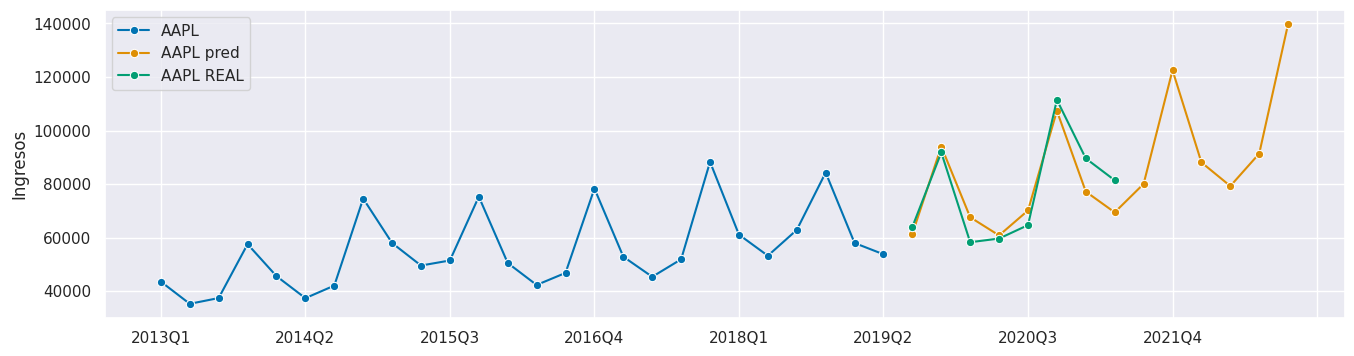

In [30]:
plot_series(y_train["2013":], y_pred,y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])

In [31]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, y_pred[0:8])

0.08128344746328568

In [32]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, y_pred[0:8])

55427683.61878385

In [33]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, y_pred[0:8])

7444.977073086515

### Elegimos como modelo el de tendencia y estacionaldad multiplicativa ya que su error es mucho menor que en el modelo MAM. 
### Pasa de un mape del 16% en el modelo MAM a uno de 8% en el AMM. Como podemos ver en el gráfico la prediccion se acerca mucho mas a la realidad

In [34]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 7)

y = trimestral['Ingresos'].astype('float64').to_period('Q')

from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend='multiplicative', seasonal='multiplicative', sp=4) #el error lo toma aditivo si no pongo nada
forecaster.fit(y)


/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ExponentialSmoothing(seasonal='multiplicative', sp=4, trend='multiplicative')

In [35]:
y_pred = forecaster.predict(fh)
y_pred

2021Q3     91136.952515
2021Q4    143326.642845
2022Q1    102016.851362
2022Q2     93273.320662
2022Q3    104033.771451
2022Q4    163608.841342
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [36]:
print(forecaster._fitted_forecaster.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Ingresos   No. Observations:                  127
Model:             ExponentialSmoothing   SSE                     1577074407.705
Optimized:                         True   AIC                           2090.501
Trend:                   Multiplicative   BIC                           2113.254
Seasonal:                Multiplicative   AICC                          2092.397
Seasonal Periods:                     4   Date:                 Sun, 08 Oct 2023
Box-Cox:                          False   Time:                         18:29:17
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7121429                alpha                 True
smoothing_trend          

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

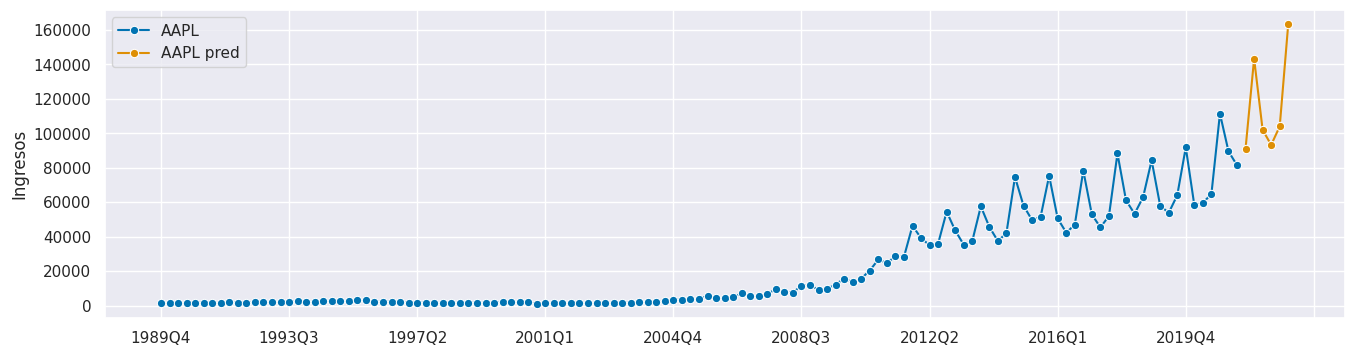

In [37]:
plot_series(y, y_pred, labels=["AAPL", "AAPL pred"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

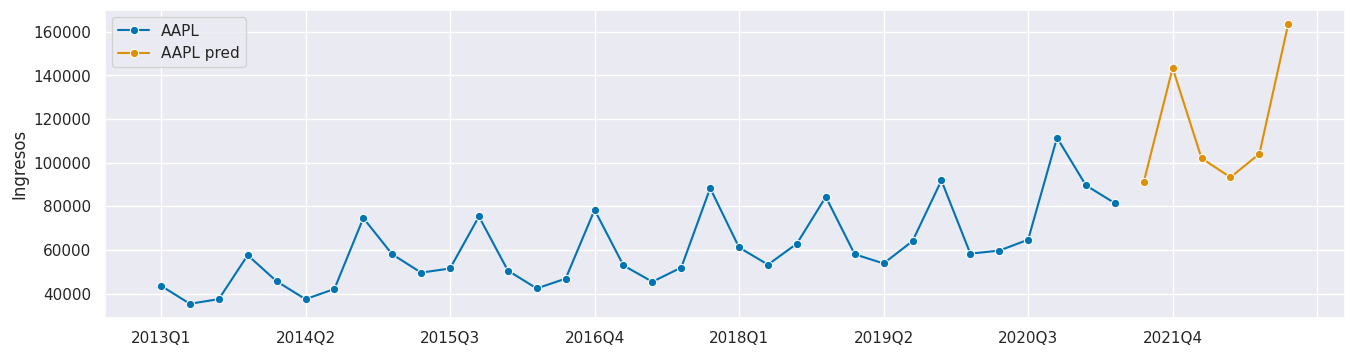

In [38]:
plot_series(y['2013':], y_pred, labels=["AAPL", "AAPL pred"])

/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

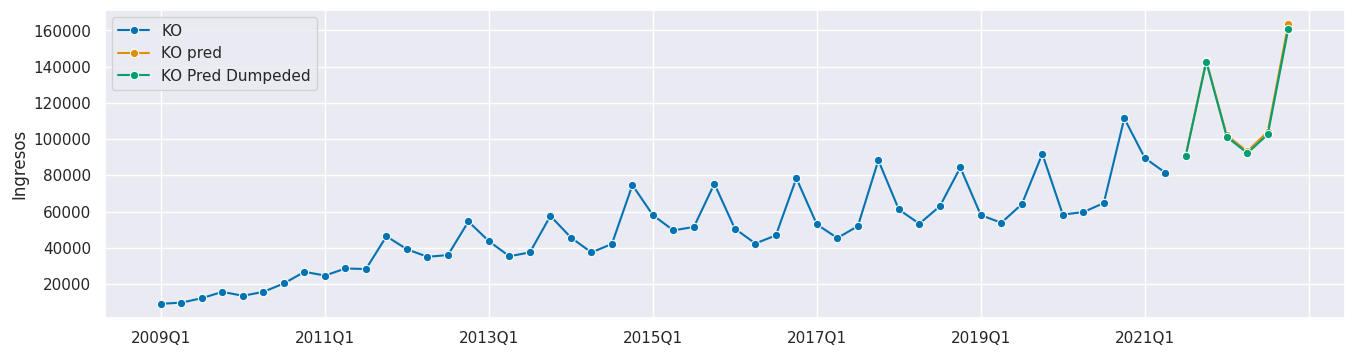

In [39]:
forecaster = ExponentialSmoothing(trend="mul",seasonal="mul",damped_trend=True, sp=4)
forecaster.fit(y)
y_pred_dump = forecaster.predict(fh)
plot_series(y["2009":], y_pred, y_pred_dump,labels=["KO", "KO pred","KO Pred Dumpeded"])

In [40]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Ingresos'])
print('Estadística de la prueba:', result[0])
print('Valor p:', result[1])

Estadística de la prueba: 1.3103508988536563
Valor p: 0.9966662671037964
